In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, classification_report

In [2]:
def split_data(Xs,y,test_size=0.2, seed=42):
    return train_test_split(Xs,y,test_size=test_size,random_state=seed)

In [3]:
df = pd.read_csv('Real_Estate_Listings.csv')
df.shape

(1185, 107)

Train Validation Test Split

In [4]:
test_df = df[df['ListType']=='For Sale'].sample(100)
train_df = df.drop(test_df.index)
test_df.shape,train_df.shape

((100, 107), (1085, 107))

In [5]:
y_price = train_df['Price']
y_listtype = np.where(train_df['ListType']=='Sold',1,0)

Price Modeling

In [6]:
Xs = train_df.drop(columns=['Price','ListType','Street','Tax Assessed Value']).fillna(0)
X_train, X_valid, y_train, y_valid = split_data(Xs,y_price)
X_train.shape, X_valid.shape

((868, 103), (217, 103))

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
preds = lin_reg.predict(X_valid)
r2_score(y_valid,preds), mean_squared_error(y_valid,preds)

(0.7740480781130035, 15954397376.550606)

Acquisition Modeling

In [8]:
Xs = train_df.drop(columns=['Price','ListType','Street']).fillna(0)
X_train, X_valid, y_train, y_valid = split_data(Xs,y_listtype)
X_train.shape, X_valid.shape

((868, 104), (217, 104))

In [9]:
log_reg = LogisticRegression(random_state=23)
log_reg.fit(X_train,y_train)
preds = log_reg.predict(X_valid)
print(classification_report(y_valid,preds))

              precision    recall  f1-score   support

           0       0.62      0.96      0.75       132
           1       0.55      0.07      0.12        85

    accuracy                           0.61       217
   macro avg       0.58      0.52      0.44       217
weighted avg       0.59      0.61      0.51       217



Property Clustering

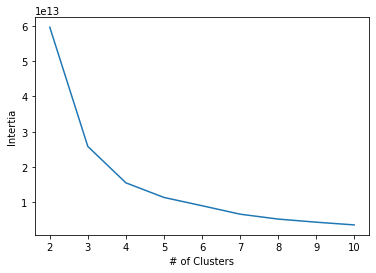

In [10]:
Xs = train_df.drop(columns=['ListType','Street']).fillna(0)

metric = []
for num_clusters in list(range(1,10)):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(Xs)
    metric.append(kmeans.inertia_)

plt.plot(range(2,len(metric)+2),metric)
plt.ylabel('Intertia')
plt.xlabel('# of Clusters')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(Xs)
pd.Series(kmeans.labels_).value_counts()

2    699
1    327
3     45
0     14
dtype: int64

Ranking Algorithm